Привет, меня зовут Гребенюк Артём. Сегодня я буду делать ревью твоего проекта!\
В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> Если все сделано хорошо. </div>

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> Некритичное замечание; если таких замечаний меньше трех — проект может быть принят без их отработки.</div>

<div class="alert alert-block alert-danger">
<b>❌ Needs fixing:</b> Грубая ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:

<div class="alert alert-block alert-info">
<b>💾 Fixed:</b> 
Hello World! ✔
</div>

Или можешь использовать эту галочку ✔ в моих комментариях, если писать особо нечего.

<div class="alert alert-block alert-warning">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- У меня есть пара ремарок, которые помогут тебе сделать проект еще лучше.
- Пробегись по моим комментариям, исправь недочёты и всё будет отлично :)
    
</div>



<div class="alert alert-block alert-success">
<b>Привет!</b> Отличная работа над ремарками! Проект принят, поздравляю, желаю удачи в дальнейшем обучении :)

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">
<b>Remarks:</b>

Любому проекту нужно введение. Также стоит задуматься, как еще его можно дополнить, чтобы сделать более ценным для читателя. В студенческом ноушене (если нет доступа, спроси куратора) есть статья о том, как мы оформляем работы.
    
Также советую тебе взглянуть на <a href="https://www.kaggle.com/notebooks/">работы</a> профессиональных аналитиков, чтобы оценить, как другие люди оформляют и проводят исследования. </div>

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> ✔
    
- стоит отделять импорты от открытия датасета. Это делается для того, чтобы иметь возможность в любой момент дописать новые библиотеки, настройки или ключевые константы, перезапустить ячейку с импортами и продолжить работу, не перетирая датасет.


Переименую столбец с некорректным названием:

In [3]:
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})

In [4]:
display(data)
data.describe().T

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> ✔
    
- при выводе табличного аутпута лучше пользоваться `display()` вместо `print()
- в случаях, когда в аутпут попадает результат только одной функции, ни `print()`, ни `display()` не нужны - юпитер сам отрисует результат

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> ✔
    
функция `describe()` может быть очень полезна при знакомстве с датасетом, давай её используем. Советую почитать про её аргументы - пригодится в следующих проектах, а также рекомендую рассматривать её в транспонированном виде - никто не любит горизонтальные скроллбары - `df.describe().T` 

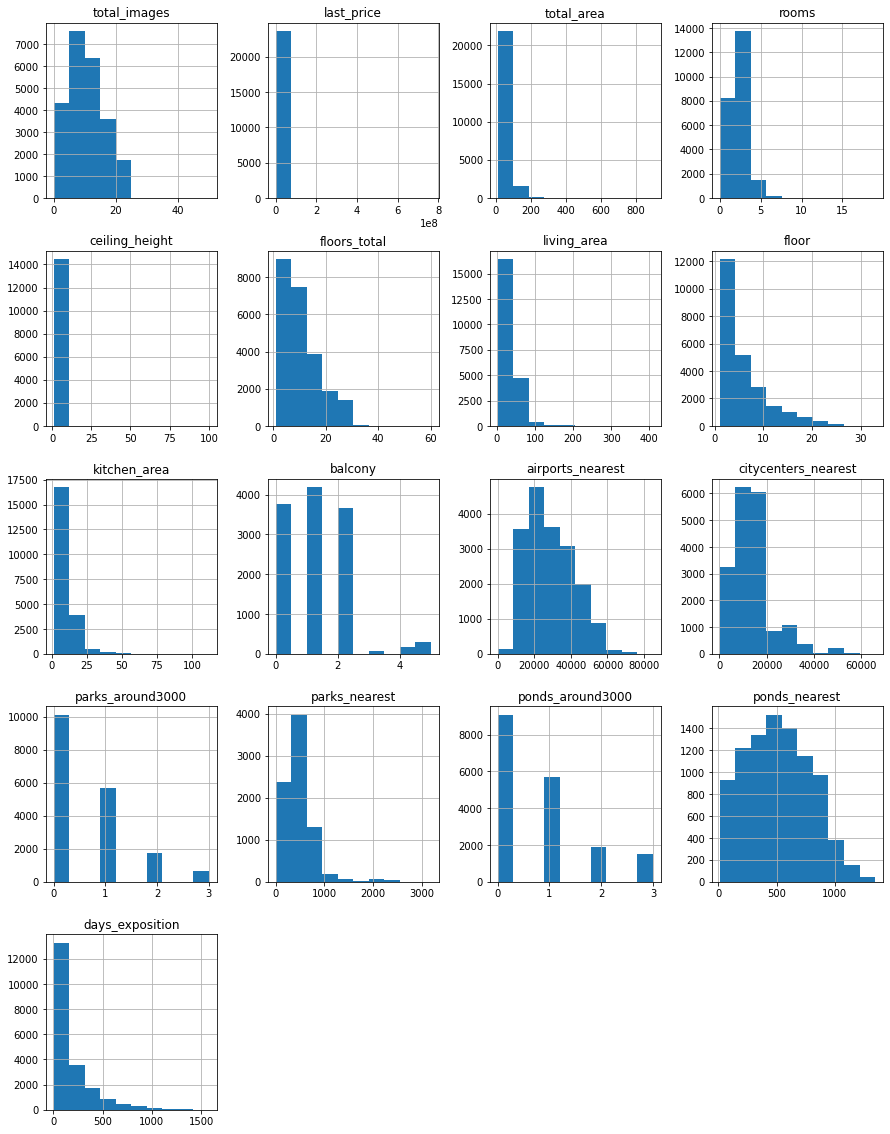

In [5]:
data.hist(bins=10, figsize=(15, 20))
plt.show()

Далее необходимо избавиться от пропусков в столбцах, неявных дубликатов в названия населенных пунктов и несоответствующих типов данных в столбцах. 

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> 
    
- давай избавимся от технического аутпута перед визуализациями ✔
- следует написать промежуточный вывод по этому разделу - что удалось увидеть, какой дальнейший план? ✔

### Предобработка данных

Нахожу количество пропущенных значений в столбцах:

In [6]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Изучаю данные в выборке "floors_total" и принял решение удалить строки с пропущенными значениями

In [7]:
data['floors_total'] = data['floors_total'].fillna(0)
data = data[data['floors_total'] != 0]
#print(data['floors_total'].value_counts())
#print(data['floors_total'].unique())
#floors_total_null = data[data['floors_total'] == 0]
#print(floors_total_null.head())
#data.info() #проверяю

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> ✔ 
    
- старайся пояснения к исследованию всегда писать в маркдаун-ячейках. Через # Обычно пишутся технические комментарии к нетривиальным участкам кода

Удаляю строки с пропущенными значениями в столбце locality_name, которые нельзя восстановить(менее 1%):

In [8]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

Работаю с дубликатами в наименованиях населенных пунктов:

In [9]:
def func_name(locality_name):
    up_name = []
    for word in locality_name.split():
        for w in word:
            if w.isupper():
                up_name.append(word)
                break
    return ' '.join(up_name)
 
data['locality_name'] = data['locality_name'].apply(func_name)

#print(data['locality_name'].unique())  # проверяю замены

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> здорово, что разбираешься с неявными дубликатами! Можно упростить код и сделать его более универсальным, если воспользоваться тем фактом, что названия всегда начинаются с заглавной буквы, а та часть строки, которая записана строчными - это тип населённого пункта. По этому критерию можно отсечь лишнюю часть тсроки ен вдаваясь в подробности, какие именно населенные пункты есть в датасете

<div class="alert alert-block alert-success">
   Замечательно!

Изучил данные в выборке "data[(data['rooms'] == 0) & (data['studio'] == True)]", вероятно 0 - это студии и квартиры свободной планировки

In [10]:
#mb_studio = data[(data['rooms'] == 0) & (data['studio'] == True)]
#print(mb_studio['kitchen_area'].unique())
#print(mb_studio['living_area'].value_counts())

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> давай проверим, не являются ли квартир с нулём комнат студиями или квартирами свободной планировки

Аномально большие значения в столбце ceiling_height делю на 10 (вероятная ошибка ввода):

In [11]:
data.loc[data['ceiling_height'] >= 24, 'ceiling_height'] = data['ceiling_height'] / 10
#print(data['ceiling_height'].unique()) #проверка замены

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks:</b> ✔ тут тоже можно написать более универсальное решение - функцию, которая будет делить на 10 слишком большие значения

Заменяем пропущенные значения в столбцах is_apartment и balcony:

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False) #вероятно при заполнении объявления для квартир не отмечали "нет" в графе "апартаменты"
data['balcony'] = data['balcony'].fillna(0) # вероятно в квартире нет балконов и поле не заполнялось

Заполняю оставшиеся пропуски в ceiling_height медианным значением столбца ceiling_height:

In [13]:
median_ceiling_height = data['ceiling_height'].median() 
data['ceiling_height'] = data['ceiling_height'].fillna(median_ceiling_height)

Создаю переменную для медианного значения жил. площади и заполняю пропуски в living_area в зависимости от количества комнат

In [14]:
median_la = data.groupby('rooms')['living_area'].median()
for liv_ar in data['rooms'].unique():
    data.loc[data['rooms'] == liv_ar, 'living_area'] = data.loc[data['rooms'] == liv_ar, 'living_area'].fillna(median_la[liv_ar])

Создаю переменную для медианного значения площади кухни и заполняю пропуски в kitchen_area в зависимости от количества комнат:

In [15]:
median_ka = data.groupby('rooms')['kitchen_area'].median()
for kit_ar in data['rooms'].unique():
    data.loc[data['rooms'] == kit_ar, 'kitchen_area'] = data.loc[data['rooms'] == kit_ar, 'kitchen_area'].fillna(median_ka[kit_ar])

Создаю переменную для медианного значения расстояния до аэропорта и заполняю пропуски в airports_nearest в зависимости от названия населенного пункта:

In [16]:
median_air = data.groupby('locality_name')['airports_nearest'].median()
for air_n in data['locality_name'].unique():
    data.loc[data['locality_name'] == air_n, 'airports_nearest'] = data.loc[data['locality_name'] == air_n, 'airports_nearest'].fillna(median_air[air_n])

Создаю переменную для среднего кол-ва парков в радиусе 3 км и заполняю пропуски в parks_around3000 в зависимости от названия населенного пункта

In [17]:
mean_park3000 = data.groupby('locality_name')['parks_around3000'].mean()
for park3000 in data['locality_name'].unique():
    data.loc[data['locality_name'] == park3000, 'parks_around3000'] = data.loc[data['locality_name'] == park3000, 'parks_around3000'].fillna(mean_park3000[park3000])

Создаю переменную для среднего кол-ва водоемов в радиусе 3 км и заполняю пропуски в ponds_around3000 в зависимости от названия населенного пункта:


In [18]:
mean_pond3000 = data.groupby('locality_name')['ponds_around3000'].mean()
for pond3000 in data['locality_name'].unique():
    data.loc[data['locality_name'] == pond3000, 'ponds_around3000'] = data.loc[data['locality_name'] == pond3000, 'ponds_around3000'].fillna(mean_pond3000[pond3000])

Создаю переменную для медианного расстояния до парка и заполняю пропуски в parks_nearest в зависимости от названия населенного пункта:

In [19]:
median_park_n = data.groupby('locality_name')['parks_nearest'].median()
for park_n in data['locality_name'].unique():
    data.loc[data['locality_name'] == park_n, 'parks_nearest'] = data.loc[data['locality_name'] == park_n, 'parks_nearest'].fillna(median_park_n[park_n])

Создаю переменную для медианного расстояния до водоема и заполняю пропуски в ponds_nearest в зависимости от названия населенного пункта


In [20]:
median_pond_n = data.groupby('locality_name')['ponds_nearest'].median()
for pond_n in data['locality_name'].unique():
    data.loc[data['locality_name'] == pond_n, 'ponds_nearest'] = data.loc[data['locality_name'] == pond_n, 'ponds_nearest'].fillna(median_pond_n[pond_n])

Создаю переменную для высоты полотка в зависимости от этажности дома и заполняю пропуски в ceiling_height:

In [21]:
median_ceil_h = data.groupby('floors_total')['ceiling_height'].median()
for ceil_h in data['floors_total'].unique():
    data.loc[data['floors_total'] == ceil_h, 'ceiling_height'] = data.loc[data['floors_total'] == ceil_h, 'ceiling_height'].fillna(median_ceil_h[ceil_h])

#print(data.isna().sum()) # проверяю

Проверяю и устраняю редкие значения в столбце ceiling_height и floors_total:

In [22]:
#data['ceiling_height'].describe()
#data.boxplot(column='ceiling_height')
#data['ceiling_height'].hist(bins=30, range=(0, 5))
data = data[(data['ceiling_height'] >= 2.4) & (data['ceiling_height'] <= 5)]

Меняю типы данных в столбцах 'balcony' и 'floors_total' c вещественных значений на целочисленные и меняю разрадность на 32

In [23]:
for col in ['total_images', 'rooms', 'floor', 'balcony', 'floors_total']:
    data[col] = data[col].astype('int32')
    
for col in ['total_area', 'last_price', 'ceiling_height','living_area','kitchen_area','airports_nearest', 'ponds_nearest', 'citycenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'days_exposition']:
    data[col] = data[col].astype('float32')

Перевожу данные в first_day_exposition из строкового типа в datetime64 для работы с этим типом данных:

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data.info() #проверка замен

### Проведите исследовательский анализ данных

Считаю и добавляю в таблицу: цена одного квадратного метра, день публикации объявления, месяц публикации объявления, год публикации объявленияб, расстояние в км до центра города:

In [25]:
data['1kvm_price'] = data['last_price'] / data['total_area'] #цена одного квадратного метра

data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday #день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month #месяц публикации объявления

data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year #год публикации объявления

#тип этажа квартиры (значения — «первый», «последний», «другой»):
def categorize_floor (row):
    if row ['floor'] == 1:
        return 'первый'
    if row ['floor'] == row['floors_total']:
        return 'последний' 
    return 'другой'
data['floor_category'] = data.apply(categorize_floor, axis=1)

data['citycenters_nearest_km'] = data['citycenters_nearest'] / 1000 #расстояние в км до центра города

#data.info()
#print(data.head(20))

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> отличная функция!

Изучаю следующие параметры объектов:
общая площадь:

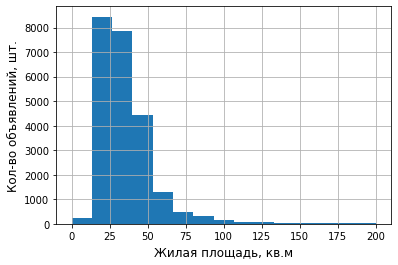

In [26]:
data['living_area'].hist(bins=15, range= (0,200))
plt.plot()
plt.xlabel('Жилая площадь, кв.м', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

площадь кухни:

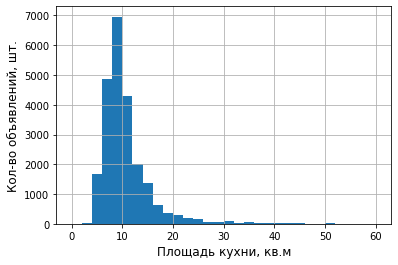

In [27]:
data['kitchen_area'].hist(bins=30, range= (0,60))
plt.plot()
plt.xlabel('Площадь кухни, кв.м', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

цена объекта:

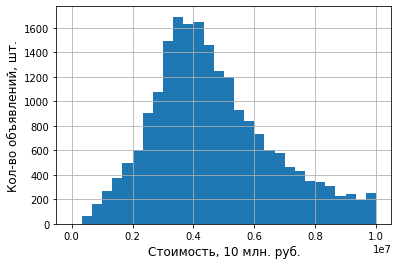

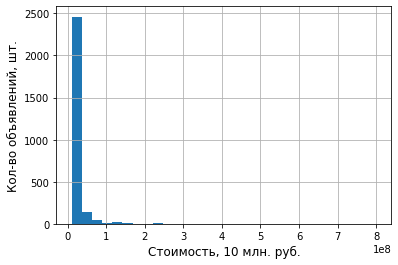

In [28]:
data['last_price'].hist(bins=30, range= (0,10000000))
plt.plot()
plt.xlabel('Стоимость, 10 млн. руб.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

data['last_price'].hist(bins=30, range= (10000001,800000000))
plt.xlabel('Стоимость, 10 млн. руб.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

количество комнат:

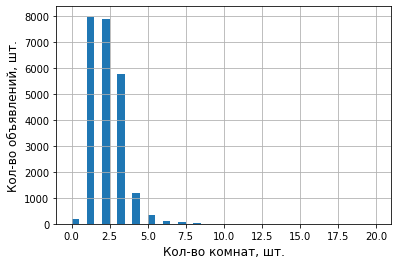

In [29]:
data['rooms'].hist(bins=40, range= (0,20))
plt.plot()
plt.xlabel('Кол-во комнат, шт.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

высота потолков:

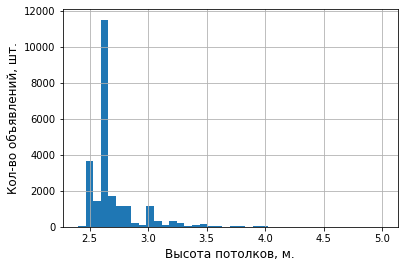

In [30]:
data['ceiling_height'].hist(bins=40, range= (2.4,5))
plt.plot()
plt.xlabel('Высота потолков, м.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

этаж квартиры:

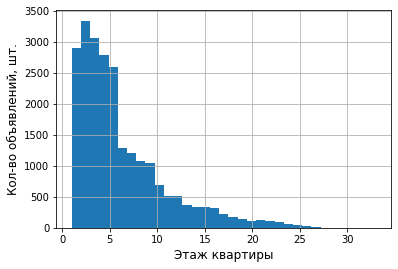

In [31]:
data['floor'].hist(bins=33, range= (1,33))
plt.plot()
plt.xlabel('Этаж квартиры', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

тип этажа квартиры:

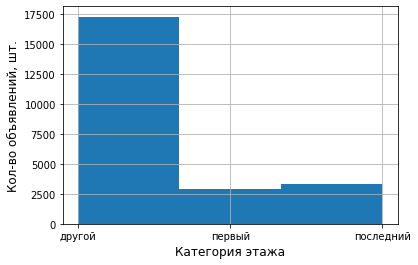

In [32]:
data['floor_category'].hist(bins=3)
plt.plot()
plt.xlabel('Категория этажа', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

общее количество этажей в доме:

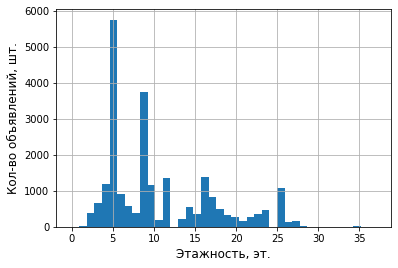

In [33]:
data['floors_total'].hist(bins=40, range= (0,37))
plt.plot()
plt.xlabel('Этажность, эт.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

расстояние до центра города в метрах:

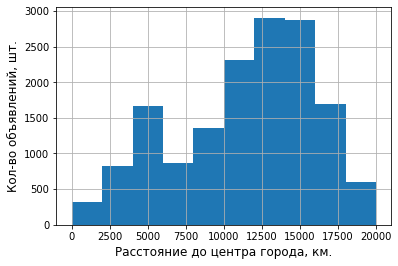

In [34]:
data['citycenters_nearest'].hist(bins=10, range= (0,20000))
plt.plot()
plt.xlabel('Расстояние до центра города, км.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

расстояние до ближайшего аэропорта:

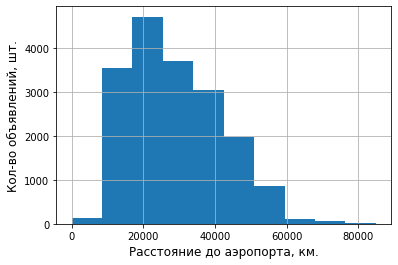

In [35]:
data['airports_nearest'].hist(bins=10, range= (0,84869))
plt.plot()
plt.xlabel('Расстояние до аэропорта, км.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

расстояние до ближайшего парка:

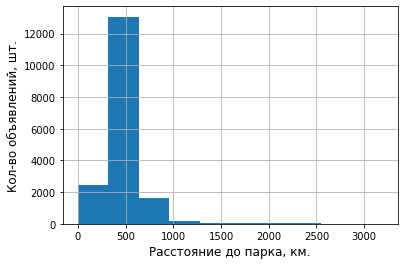

In [36]:
data['parks_nearest'].hist(bins=10, range= (0,3190))
plt.plot()
plt.xlabel('Расстояние до парка, км.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

#день, месяц и сезон публикации объявления:

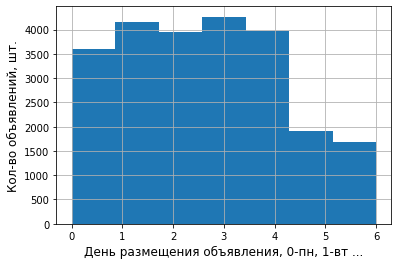

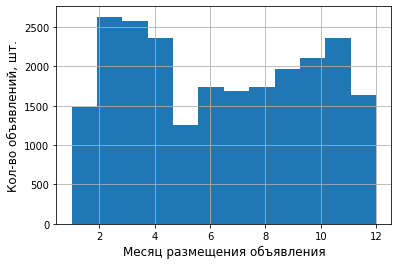

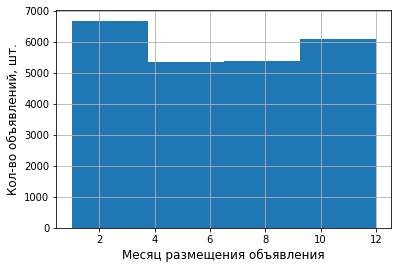

In [37]:
data['weekday'].hist(bins=7, range= (0,6))
plt.plot()
plt.xlabel('День размещения объявления, 0-пн, 1-вт ...', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()
data['month'].hist(bins=12, range= (1,12))
plt.plot()
plt.xlabel('Месяц размещения объявления', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()
data['month'].hist(bins=4, range= (1,12))
plt.plot()
plt.xlabel('Месяц размещения объявления', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Дальше будут проекты, где тебе придется строить очень много графиков, поэтому лучше сразу их правильно строить. На данном графике у тебя должны быть подписаны оси, ось Y должна содержать еще размерность данных (шт., млн. и т.д.). Оси и заголовок должны быть на одном языке. В заголовке еще можно написать за какой период у нас данные. Поправь и другие графики в проекте.

Правильное оформление графиков сильно повышает вероятность сдачи проекта с первого раза ;)
    
Также скину тебе сайт с подборкой крутых примеров на разных библиотеках:
    
https://python-graph-gallery.com/
    
В идеале, конечно, сразу начинать осваивать какую-нибудь хорошую либу (plotly или seaborn например)

</div>

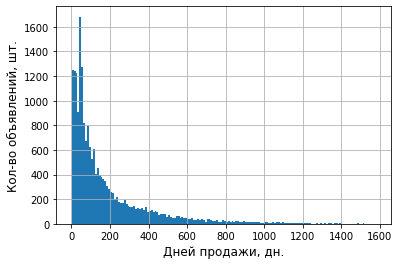

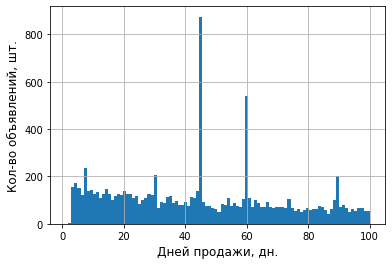

Среднее значение: 180.75328
Медианное значение: 95.0
Числовое описание данных: count    20363.000000
mean       180.753281
std        219.783234
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


In [38]:
data['days_exposition'].hist(bins=158, range= (1,1580))
plt.plot()
plt.xlabel('Дней продажи, дн.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()
data.loc[data['days_exposition'] <= 100, 'days_exposition'].hist(bins=100, range= (1,100)) #продажи до 100 дней
plt.plot()
plt.xlabel('Дней продажи, дн.', fontsize='large', color='black')
plt.ylabel('Кол-во объявлений, шт.', fontsize='large', color='black')
plt.show()
print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())
print('Числовое описание данных:', data['days_exposition'].describe())

<div class="alert alert-block alert-warning">
<b>⚠️ Remarks: ✔</b> нужно внимательно изучить продажи быстрее ста дней

Обычная продолжительность продажи квартиры 60 дней.
До 45 дней - быстрые продажи, 219 дня и больше - долгие продажи.

Вывод: Типичное объявление на продаже: одно- или двухкомнатная квартира на втором этаже в пятиэтажном доме, с жилой площадью 25-30 кв.м., и площадью кухни 5-10 кв.м.., стоимостью 4 млн. руб., с высотой потолков 2.6 м, в районе, расположенном в 12,5-15 км от центра города, и 20 км от аэропорта с парком в пешей доступности (500м.)
Большую часть объявлений размещают в будние дни, преимущественно вт-чт. В период с осени по конец весны наблюдается увеличение предложений, с «праздничной» просадкой в декабре и январе. Сумма предложений первых и последних этажей в три раза меньше количества предложений остальных этажей.

<div class="alert alert-block alert-warning">
<b>Remarks: ✔</b> было бы здорово писать какие-то промежуточные наблюдения по графикам

### Посчитайте и добавьте в таблицу новые столбцы

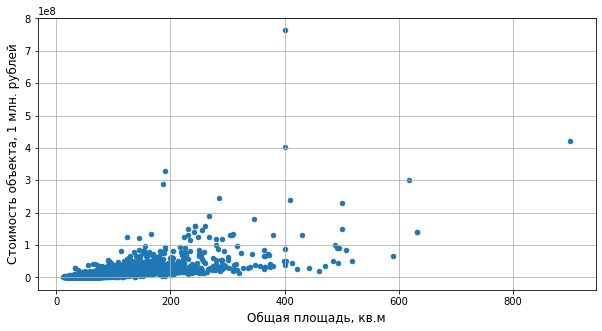

Коэффициент корреляции: 0.6519611483555736


In [39]:
#Считаю зависимости цен от:
#общей площади:
data.plot(x='total_area', y='last_price', grid=True, figsize=(10,5), kind='scatter')
plt.plot()
plt.xlabel('Общая площадь, кв.м', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))

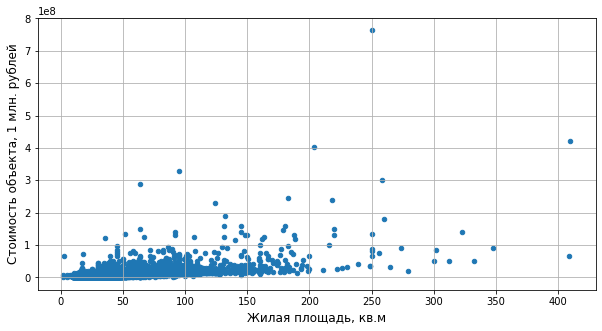

Коэффициент корреляции: 0.5531941809292532


In [40]:
#жилой площади:
data.plot(x='living_area', y='last_price', grid=True, figsize=(10,5), kind='scatter')
plt.plot()
plt.xlabel('Жилая площадь, кв.м', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

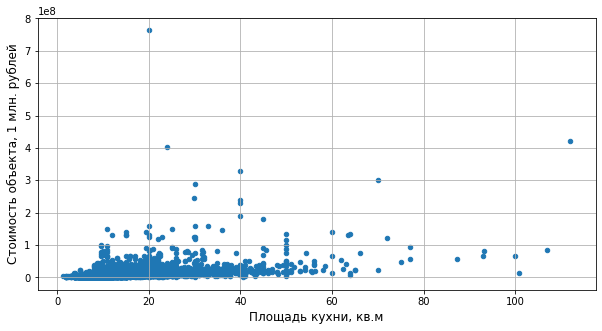

Коэффициент корреляции: 0.45168877715940553


In [41]:
#площади кухни:
data.plot(x='kitchen_area', y='last_price', grid=True, figsize=(10,5), kind='scatter')
plt.plot()
plt.xlabel('Площадь кухни, кв.м', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))

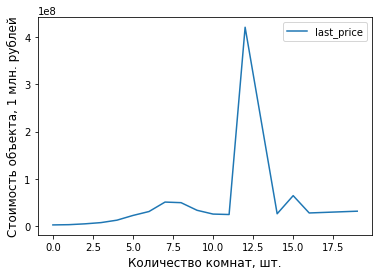

Коэффициент корреляции: 0.36242974878945333


In [42]:
#количества комнат:
data_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
data_pivot.plot()
plt.plot()
plt.xlabel('Количество комнат, шт.', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))

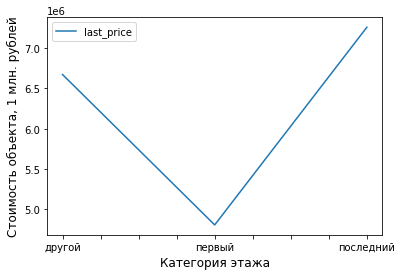

In [43]:
#этажа, на котором расположена квартира (первый, последний, другой):

data_pivot = data.pivot_table(index='floor_category', values='last_price', aggfunc='mean')
data_pivot.plot()
plt.plot()
plt.xlabel('Категория этажа', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()

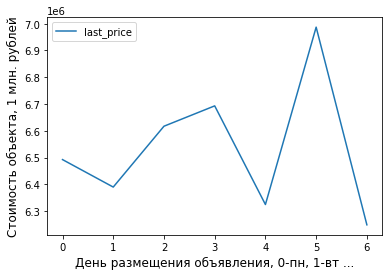

Коэффициент корреляции от дня недели: 0.0015526220187042934


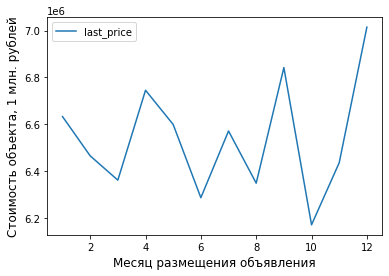

Коэффициент корреляции от месяца: 0.0023131005647850484


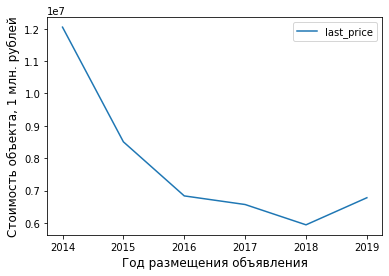

Коэффициент корреляции от года: -0.04239917565265992


In [44]:
#даты размещения (день недели, месяц, год)
data_pivot = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
data_pivot.plot()
plt.plot()
plt.xlabel('День размещения объявления, 0-пн, 1-вт ...', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции от дня недели:', data['weekday'].corr(data['last_price']))

data_pivot = data.pivot_table(index='month', values='last_price', aggfunc='mean')
data_pivot.plot()
plt.plot()
plt.xlabel('Месяц размещения объявления', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции от месяца:', data['month'].corr(data['last_price']))

data_pivot = data.pivot_table(index='year', values='last_price', aggfunc='mean')
data_pivot.plot()
plt.plot()
plt.xlabel('Год размещения объявления', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 1 млн. рублей', fontsize='large', color='black')
plt.show()
print('Коэффициент корреляции от года:', data['year'].corr(data['last_price']))

На стоимость квартиры влияет положительно размер общей, жилой и, в меньшей степени площадь кухни. 
Отрицательно влияет на стоимость квартиры первой  этаж.
Также влияние на стоимость оказывает день недели, месяц и год продажи

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> Отличная работа! Было бы еще полезно рассмотреть количество объявлений в каждой категории, эта информация может повлиять на выводы

In [45]:
#Считаю среднюю стоимость 1 кв.метра в 10 населённых пунктах с наибольшим числом объявлений:
#data['len'] = len(data['locality_name'])
#data_pv = data.pivot_table(index='locality_name', values='len', aggfunc='count').sort_values(by='len', ascending = False)
#print(data_pv.head(10))
data['kvm_price'] = data['last_price'] / data['total_area'] 
data_top_ten = data.query('locality_name == ("Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")').pivot_table(index='locality_name', values='kvm_price', aggfunc='mean')
print('Населённый пункт с самой высокой стоимостью квадратного метра из TOP-10:', data_top_ten['kvm_price'].idxmax(), data_top_ten['kvm_price'].max().astype('int'), 'рублей.')
print('Населённый пункт с самой низкой стоимостью квадратного метра из TOP-10:',data_top_ten['kvm_price'].idxmin(), data_top_ten['kvm_price'].min().astype('int'), 'рублей.')

Населённый пункт с самой высокой стоимостью квадратного метра из TOP-10: Санкт-Петербург 114771 рублей.
Населённый пункт с самой низкой стоимостью квадратного метра из TOP-10: Выборг 58238 рублей.


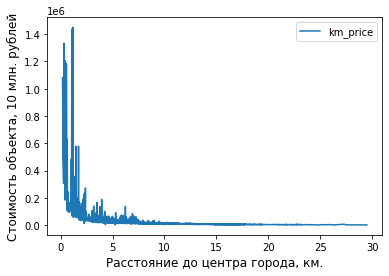

In [46]:
data['km_price'] = data['last_price'] / data['total_area'] / data['citycenters_nearest_km'] 
data_km_price = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='citycenters_nearest_km', values='km_price', aggfunc='mean')
data_km_price.plot()
plt.plot()
plt.xlabel('Расстояние до центра города, км.', fontsize='large', color='black')
plt.ylabel('Стоимость объекта, 10 млн. рублей', fontsize='large', color='black')
plt.show()


Самый дорокой квадратный метр жилья в радиусе 2 км от центра города и с отдалением от центра цена уменьшается

### Общий вывод

Типичное объявление на продаже: одно- или двухкомнатная квартира на втором этаже в пятиэтажном доме, с жилой площадью 25-30 кв.м., и площадью кухни 5-10 кв.м.., стоимостью 4 млн. руб., с высотой потолков 2.6 м, в районе, расположенном в 12,5-15 км от центра города, и 20 км от аэропорта с парком в пешей доступности (500м.) Большую часть объявлений размещают в будние дни, преимущественно вт-чт. В период с осени по конец весны наблюдается увеличение предложений, с «праздничной» просадкой в декабре и январе. Сумма предложений первых и последних этажей в три раза меньше количества предложений остальных этажей.

Обычная продолжительность продажи квартиры 95-180 дней. До 45 дней - быстрые продажи, 231 дня и больше - долгие продажи.

На стоимость квартиры влияет положительно размер общей, жилой и, в меньшей степени площадь кухни. Отрицательно влияет на стоимость квартиры первой этаж. Также влияние на стоимость оказывает день недели, месяц и год продажи.

Населённый пункт с самой высокой стоимостью квадратного метра из TOP-10: Санкт-Петербург 114770 рублей.

Населённый пункт с самой низкой стоимостью квадратного метра из TOP-10: Выборг 58238 рублей.

Самый дорокой квадратный метр жилья в радиусе 2 км от центра города и с отдалением от центра цена уменьшается.

<div class="alert alert-block alert-success">
<b>✔️ Success:</b> хороший информативный общий вывод!

In [47]:
print('Спасибо за внимание!')

Спасибо за внимание!


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [v]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод